In [1]:
# Math and Visualization Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from src import utils

In [2]:
# Loading dataset
df = pd.read_csv('data/raw/census-income.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

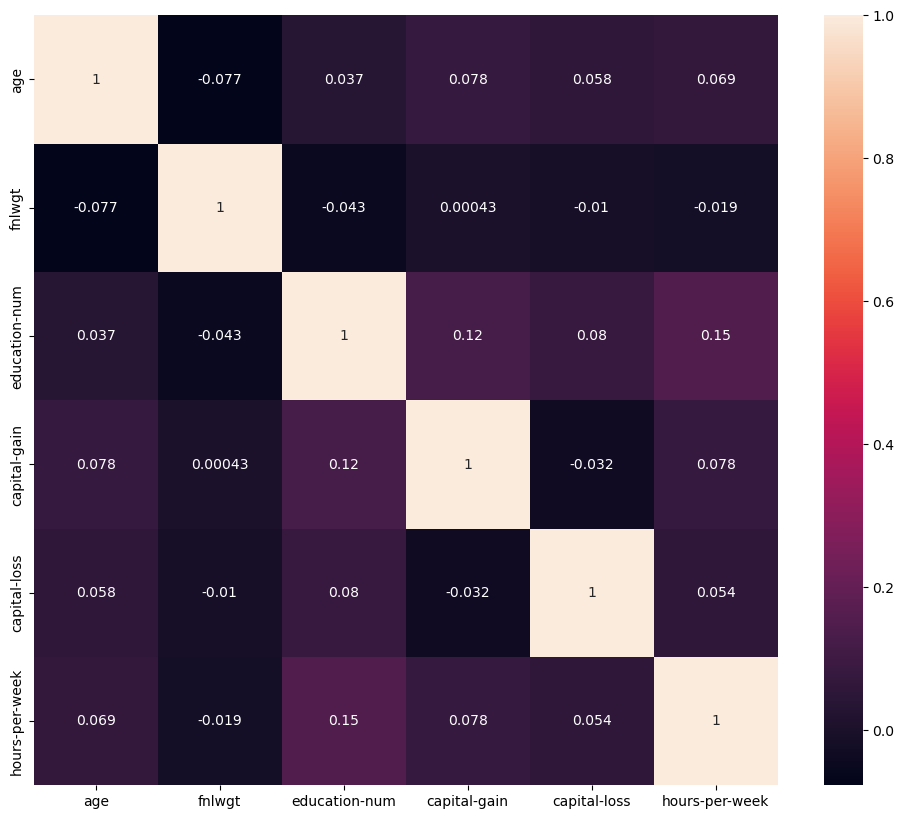

In [7]:
# Heatmap
grouped_data = df.drop(columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','annual_income'])

plt.figure(figsize=(12,10))
sns.heatmap(grouped_data.corr(), annot=True)

plt.show()

# Annual income

In [8]:
df['annual_income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
df['annual_income'].value_counts()

annual_income
<=50K    24720
>50K      7841
Name: count, dtype: int64

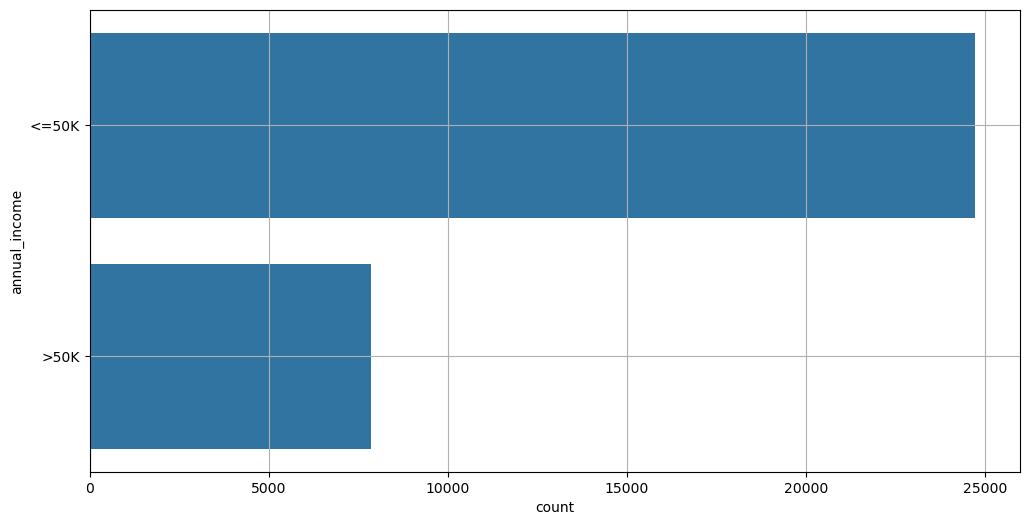

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(df['annual_income'])

plt.grid(True)
plt.show()

# Age

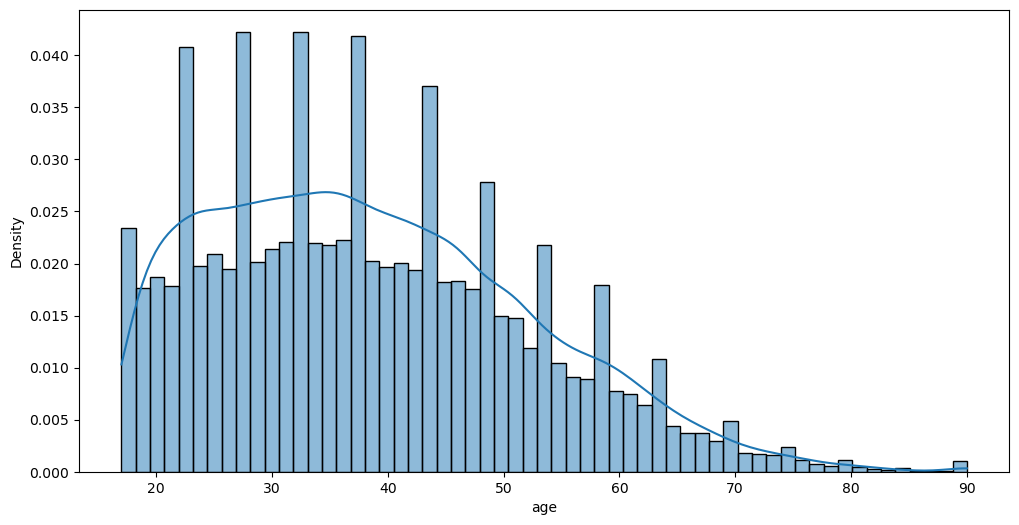

In [11]:
plt.figure(figsize=(12,6))

sns.histplot(df['age'],
             kde=True,
             stat='density'
)

plt.show()

There is Right skewness in the data. 

Majority of people fall within the age bracket of 20-50

# Work class

In [12]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

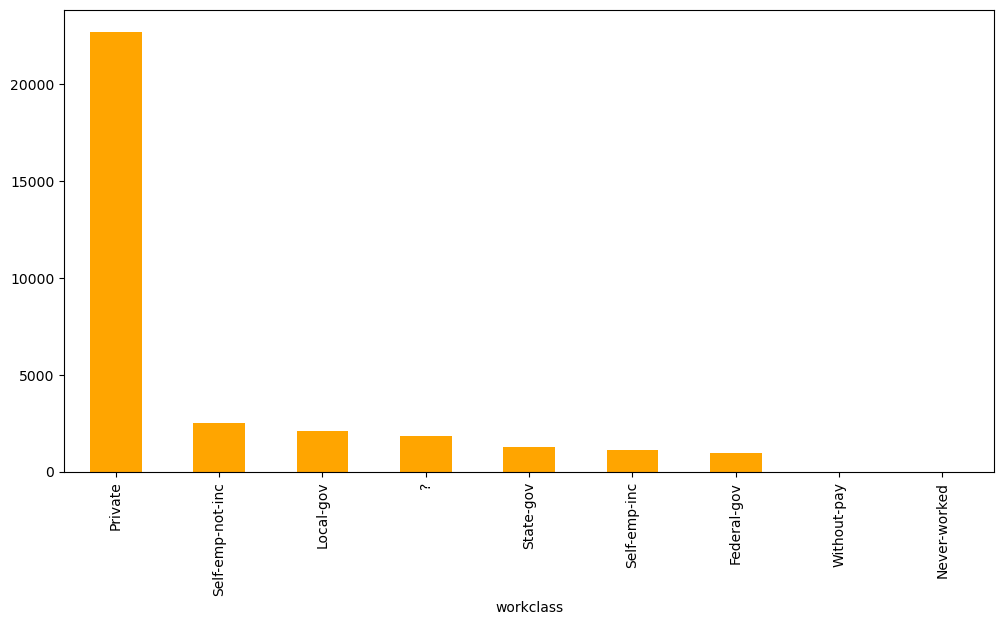

In [13]:
plt.figure(figsize=(12,6))
df['workclass'].value_counts().plot(kind='bar', color='orange')

plt.show()

In [14]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

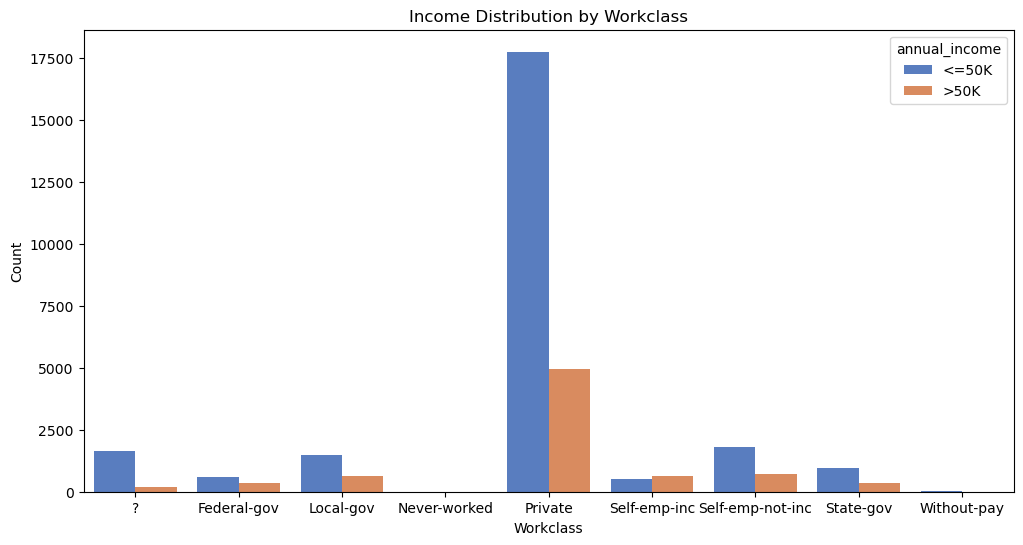

In [15]:
# Impact on Income
utils.income_impact(df, 'workclass')

# Education

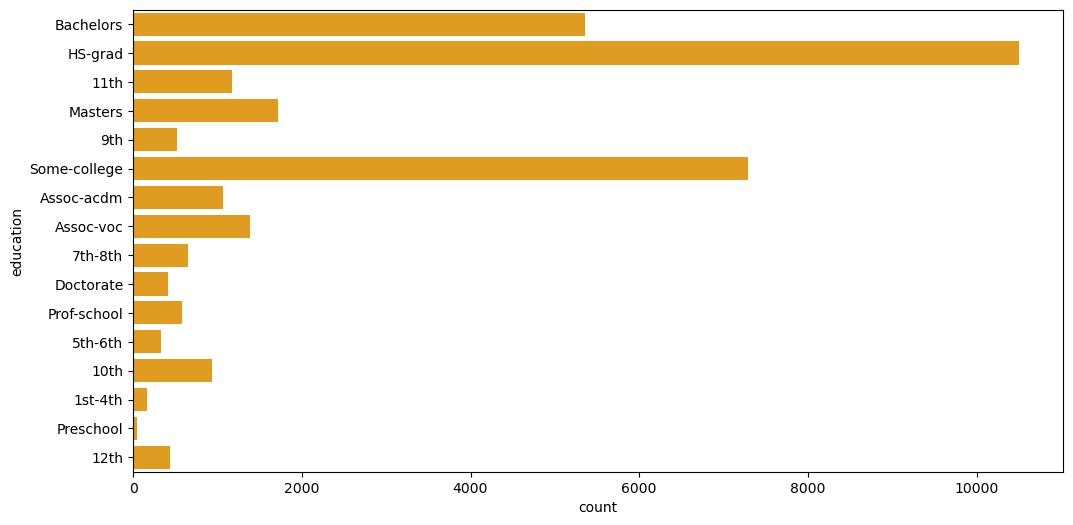

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(df['education'], color='orange')

plt.show()

In [17]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

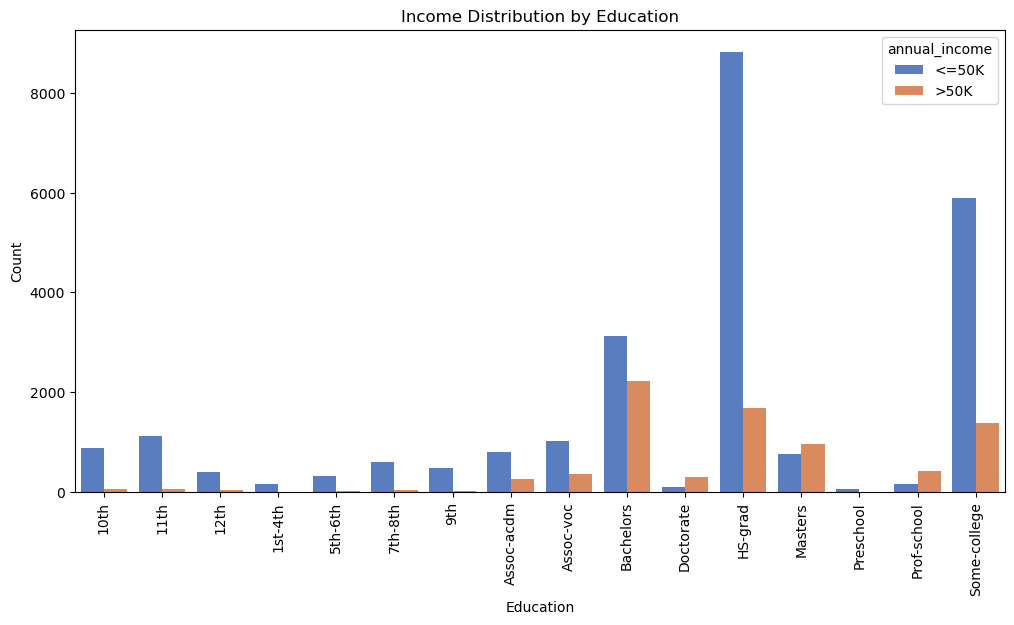

In [18]:
# Impact on Income
utils.income_impact(df, 'education', rotation=90)

# Maritial status

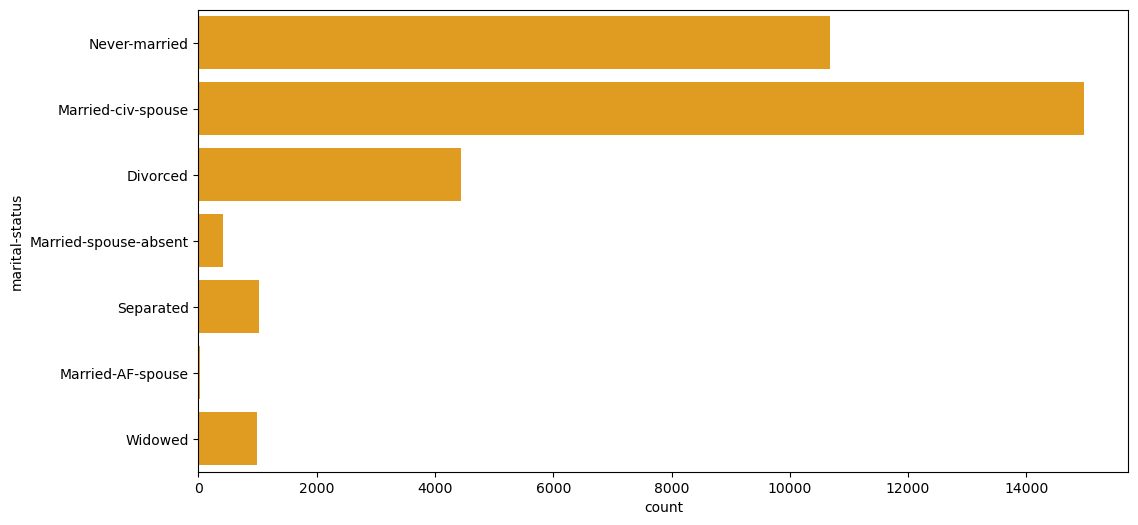

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(df['marital-status'], color='orange')

plt.show()

In [20]:
df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

# Relationship

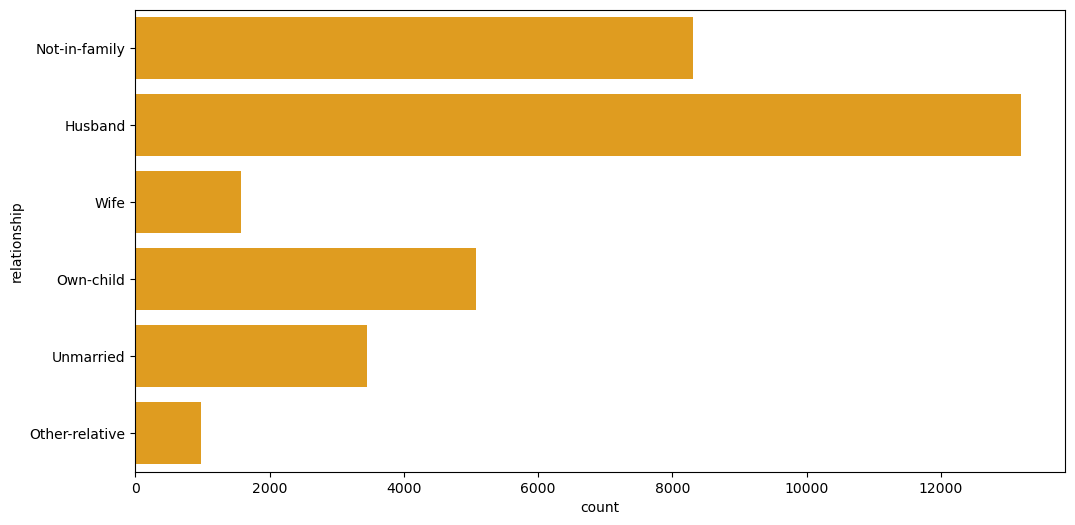

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(df['relationship'], color='orange')

plt.show()

In [22]:
df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

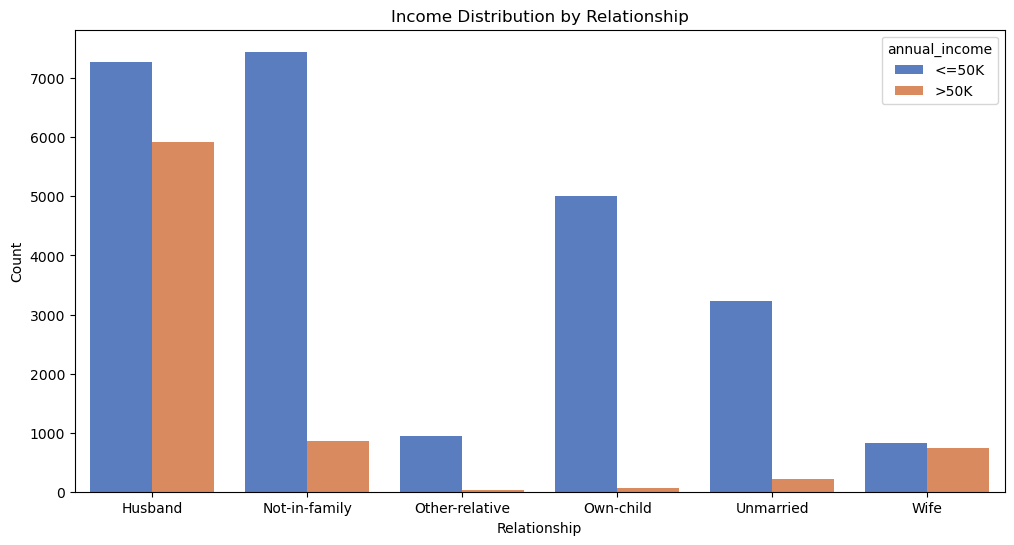

In [23]:
# Impact on Income
utils.income_impact(df, 'relationship')

# Occupation

In [24]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

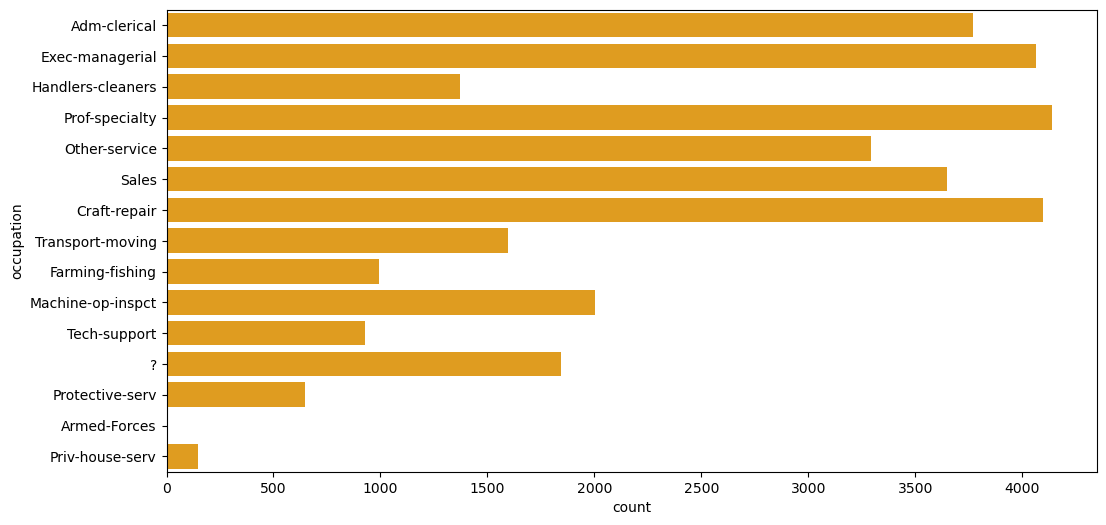

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(df['occupation'], color='orange')

plt.show()

In [26]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

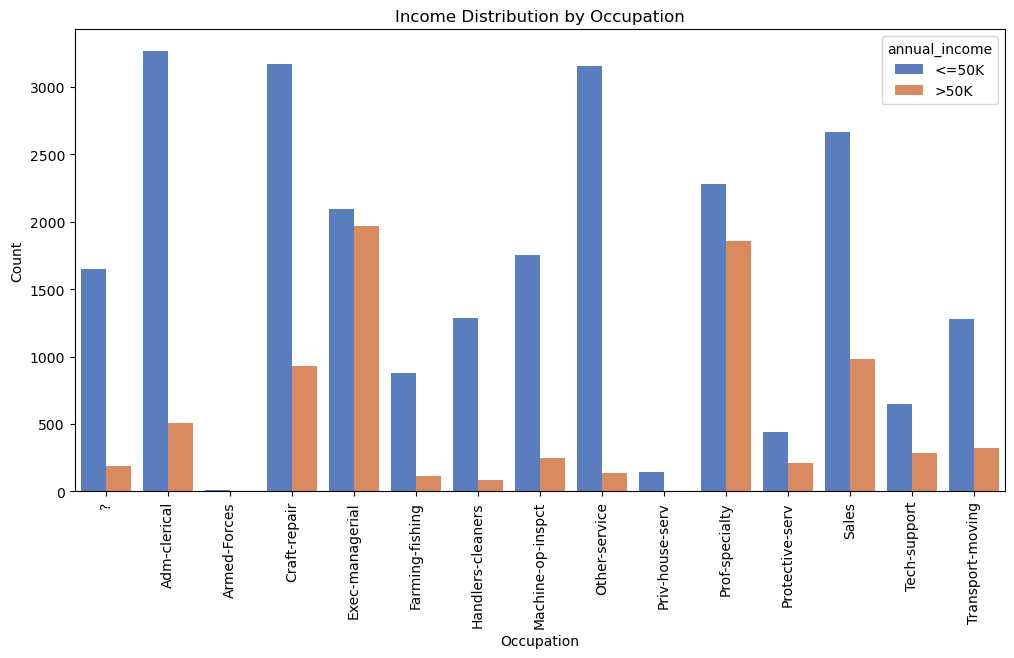

In [27]:
utils.income_impact(df, 'occupation', rotation=90)

We have missing values- different from "Never-worked", in "?"

# Race

In [28]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

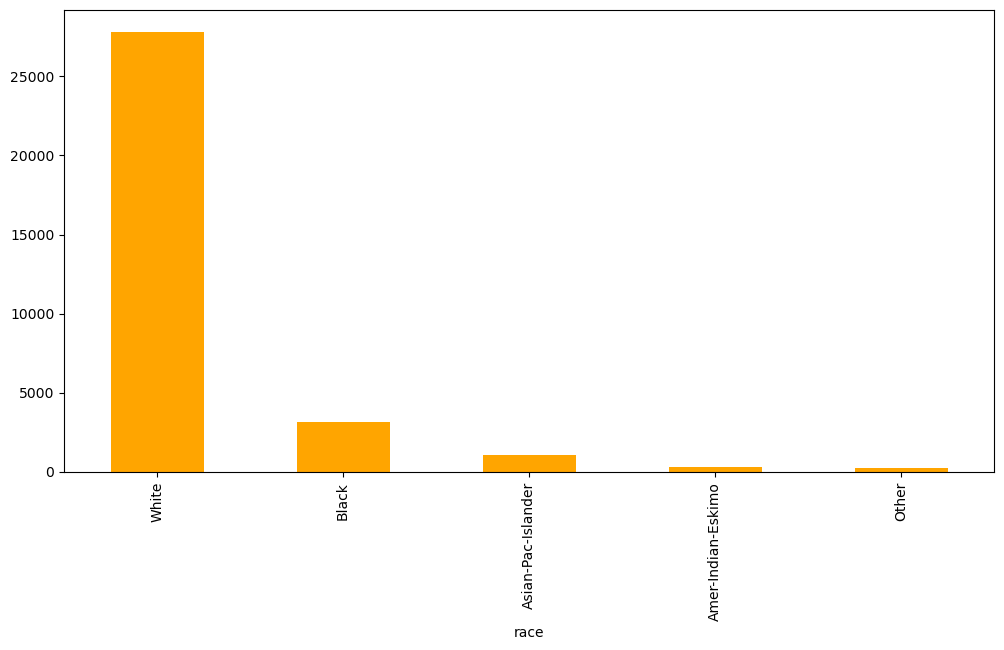

In [29]:
plt.figure(figsize=(12,6))
df['race'].value_counts().plot(kind='bar', color='orange')

plt.show()

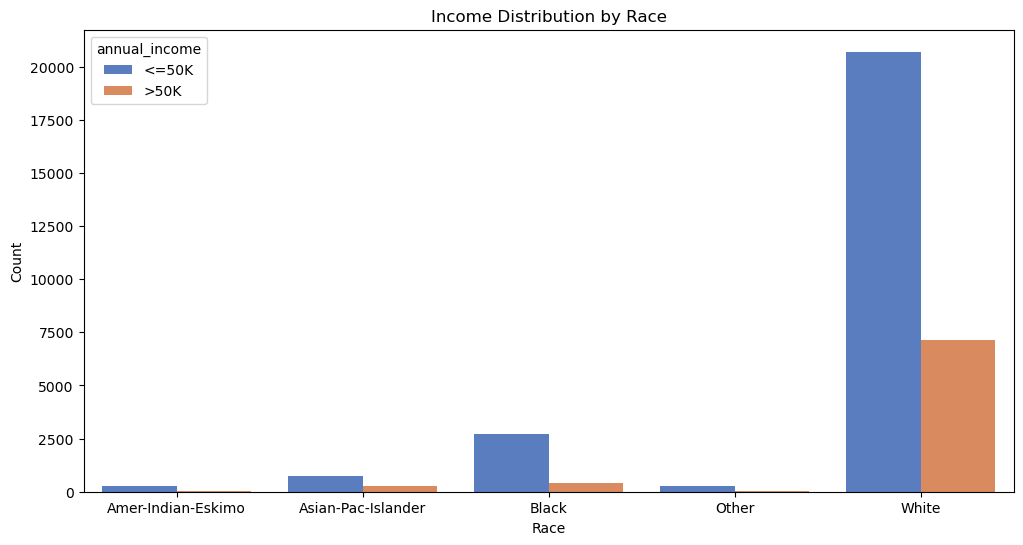

In [30]:
# Impact on Income
utils.income_impact(df, 'race')

# Sex

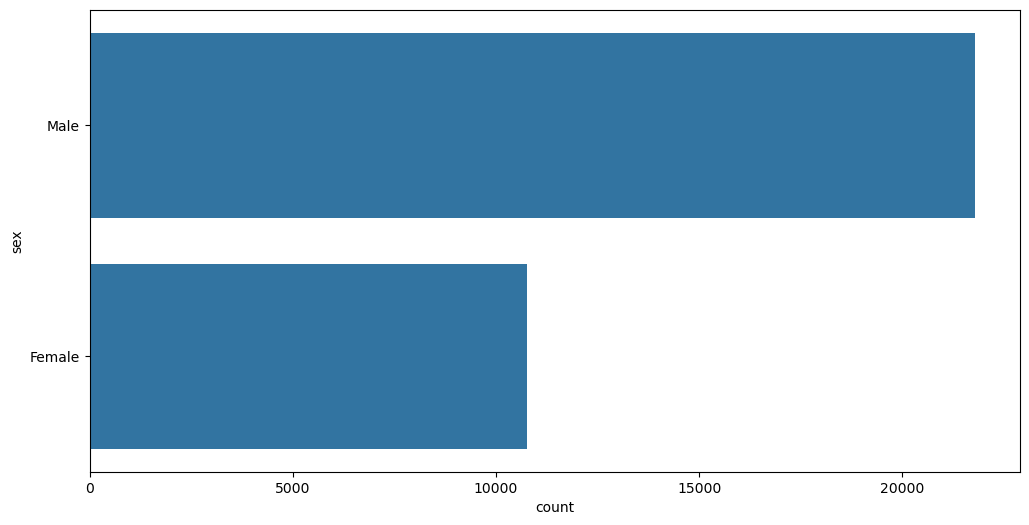

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(df['sex'])

plt.show()

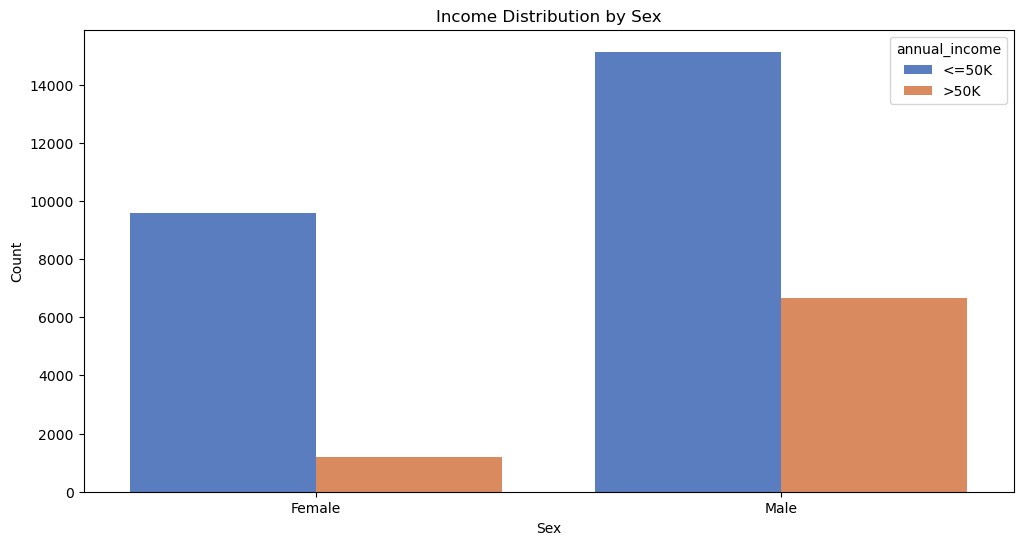

In [32]:
# Impact on Income
utils.income_impact(df, 'sex')

# Capital gain

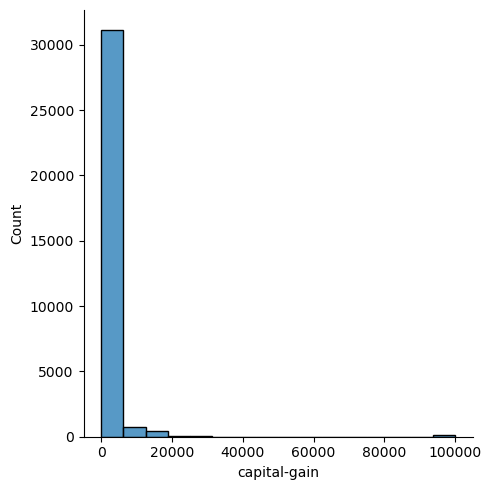

In [33]:
sns.displot(df['capital-gain'])
plt.show()

# Capital loss

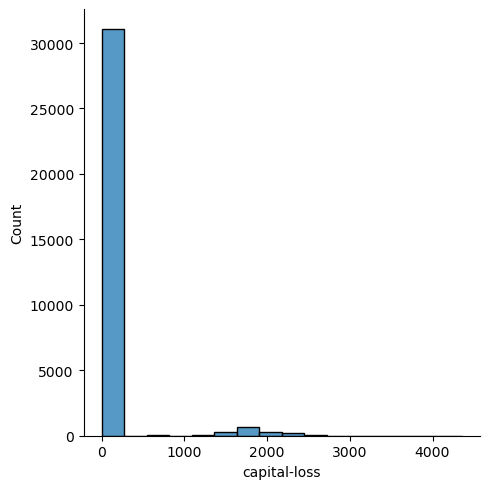

In [34]:
sns.displot(df['capital-loss'])
plt.show()

# Hours per week

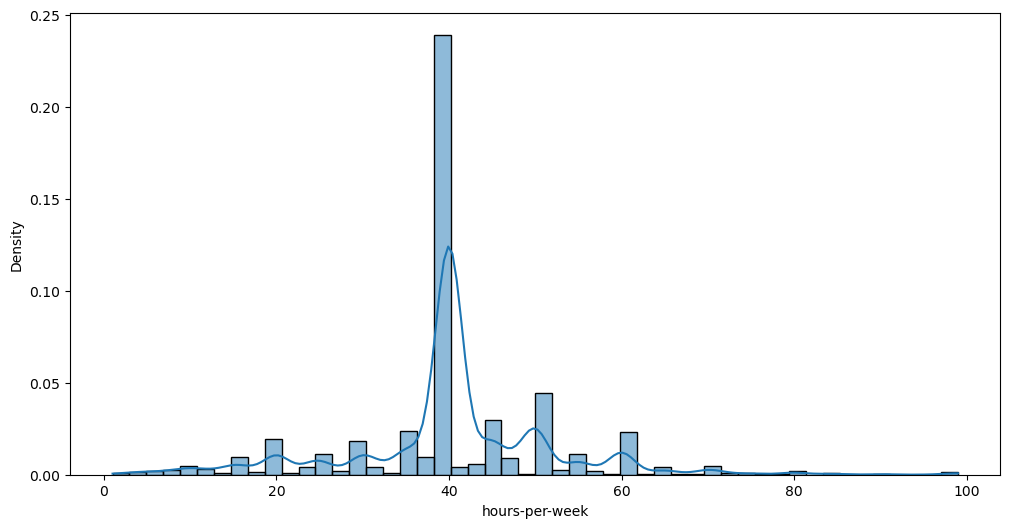

In [35]:
plt.figure(figsize=(12,6))

sns.histplot(df["hours-per-week"], 
             kde=True, 
             stat='density', 
             bins=50
)

plt.show()

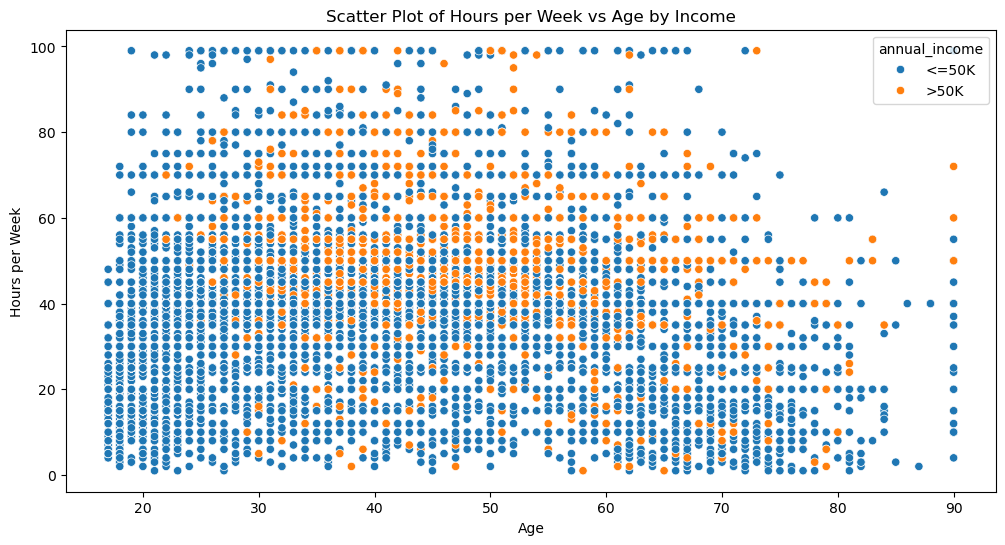

In [36]:
# Variation in Work-hours based on Age
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='annual_income')

plt.title('Scatter Plot of Hours per Week vs Age by Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')

plt.show()

# Native country

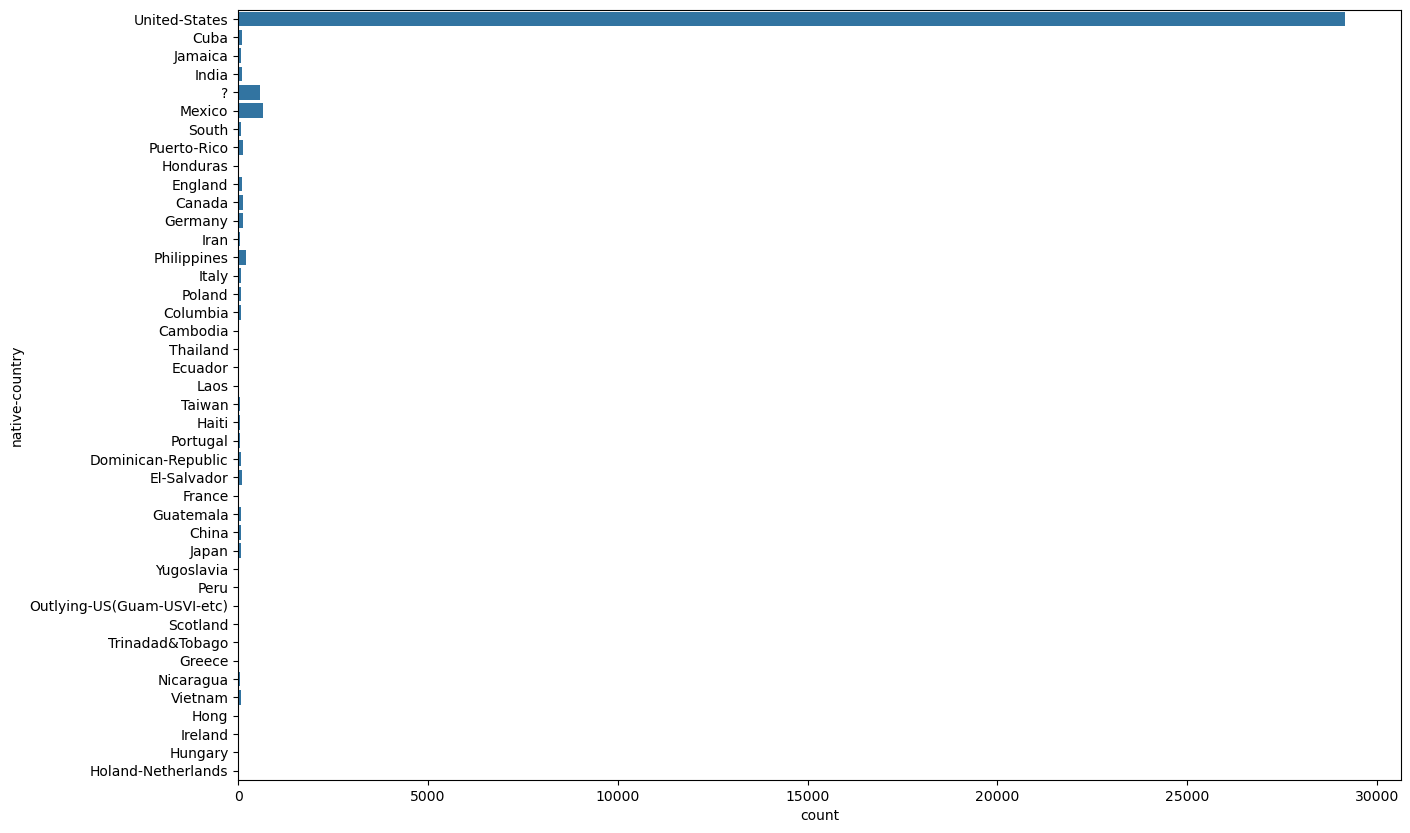

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(df['native-country'])

plt.show()

In [38]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       